In [2]:
import numpy as np

#Import the Iris dataset
dataRaw = np.loadtxt("iris-head-num.txt",delimiter=',', dtype='object')
# Get the header (first row)
header = dataRaw[0,:]

data = dataRaw[1:,:4] # Get the data (second row till end; 1-4th columns). 

data = np.vstack(data.astype(np.float32)) # Convert them to float
print(data)

# Get the labels (second row; 4th columns)
labels = np.vstack(dataRaw[1:,4].astype(np.int32))
#print(labels)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
# find unique labels and frequency
labelsUn,labelsCounts = np.unique(labels,return_counts=True)
print(labelsUn,labelsCounts)

[1 2 3] [50 50 50]


In [4]:
# count the number of rows and columns
nrows,ncols = np.shape(data)
print(nrows)
print(ncols)

nclasses = len(labelsUn) # number of unique categories
print(nclasses)

# Setting up empty arrays for the analysis
average = np.zeros((nclasses,ncols))
maxi = np.zeros((nclasses,ncols))
mini = np.zeros((nclasses, ncols))
sd = np.zeros((nclasses,ncols))

# populating the arrays with the average, max, min and standard deviation
for i in labelsUn:
    indexes = np.reshape(labels==i,nrows)
    average[i-1,:] = np.mean(data[indexes,:],axis=0)
    maxi[i-1,:] = np.max(data[indexes,:],axis=0)
    mini[i-1,:] = np.min(data[indexes,:],axis=0)
    sd[i-1,:] = np.std(data[indexes,:],axis=0)


print(average)
print(maxi)
print(mini)
print(sd)

150
4
3
[[5.00599957 3.41800022 1.46399999 0.24399997]
 [5.93600178 2.76999998 4.26000023 1.32599986]
 [6.58799934 2.97400022 5.55200052 2.02600026]]
[[5.80000019 4.4000001  1.89999998 0.60000002]
 [7.         3.4000001  5.0999999  1.79999995]
 [7.9000001  3.79999995 6.9000001  2.5       ]]
[[4.30000019 2.29999995 1.         0.1       ]
 [4.9000001  2.         3.         1.        ]
 [4.9000001  2.20000005 4.5        1.39999998]]
[[0.34894693 0.37719488 0.17176732 0.10613199]
 [0.51098341 0.31064451 0.46518815 0.19576517]
 [0.62948871 0.31925544 0.5463478  0.27188972]]


In [5]:
# Find outliers per class and feature based on the formula mean+-2*sd
# More optimal ways are available but let's do it with nested for loops for revision

outliers2sd = np.zeros((nclasses,ncols))
for i in labelsUn:
    indexes = np.reshape(labels==i,nrows)
    classData = data[indexes,:]
    for j in range(ncols):
        thresholdLow = average[i-1,j]-2*sd[i-1,j]
        thresholdHigh = average[i-1,j]+2*sd[i-1,j]
        remain = [x for x in classData[:,j] if(x > thresholdLow)]
        remain = [x for x in classData[:,j] if(x < thresholdHigh)]
        outliers2sd[i-1,j] = 100 * (labelsCounts[i-1] - len(remain)) / labelsCounts[i-1]

In [6]:
print(outliers2sd)

[[2. 4. 4. 4.]
 [2. 2. 0. 2.]
 [2. 4. 6. 0.]]


In [7]:
# Export to .csv file
decimals = 2
fmt = "%.2f"
formatf = ".csv"
species = np.array(['setosa','versicolor','virginica'])
for i in range(len(labelsUn)):
    temp = np.vstack([average[i,:], mini[i,:],maxi[i,:],sd[i,:],outliers2sd[i,:]]).T
    temp = np.around(temp,decimals)
    temp_str = np.char.mod(fmt,temp)
    rows = np.array(header[:-1].astype("U"))[:,np.newaxis]
    rowsf = np.hstack((rows, temp_str))
    headerf = [species[i], 'mean','min','max','std','outliers2sd%']
    np.savetxt(species[i]+formatf,np.vstack((headerf,rowsf)),delimiter=',',fmt='%s')

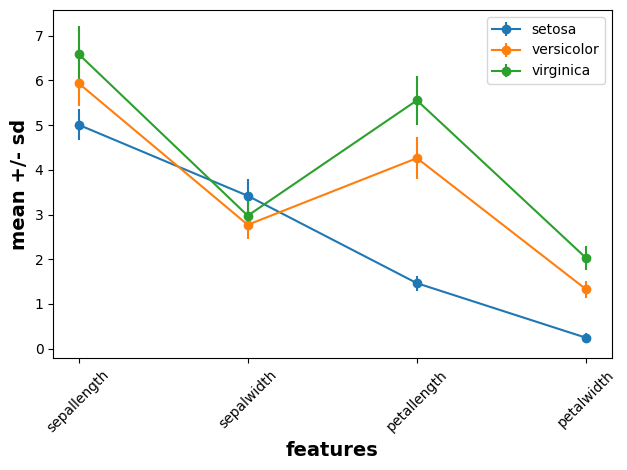

In [10]:
# Plotting the error bars (std) around the mean
import matplotlib.pyplot as plt

features = np.array(header[:-1].astype("U"))
x = np.arange(len(features))

fig, ax = plt.subplots()
for i in labelsUn:
    ax.errorbar(x, average[i-1,:], sd[i-1,:], marker="o", label=species[i-1])

# adding the aesthetics
ax.legend(loc="upper right")
ax.set_xlabel("features", fontsize=14, fontweight='bold')
ax.set_ylabel("mean +/- sd", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45)
fig.tight_layout()

In [11]:
# Boxplots
data0 = [12, 10,100,11,3,20]
print("data : ", data)
print("Q1 quantile of data : ",np.quantile(data0, 0.25))
print("Q2 quantile of data : ",np.quantile(data0, 0.5))
print("Q3 quantile of data : ",np.quantile(data0, 0.75))
print("median of data  : ", np.median(data0))
print("mean of data: ", np.mean(data0))

data :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

{'whiskers': [<matplotlib.lines.Line2D at 0x10feb70d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10feb72b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10feb4eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x10feb7d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x10feb6380>],
 'means': []}

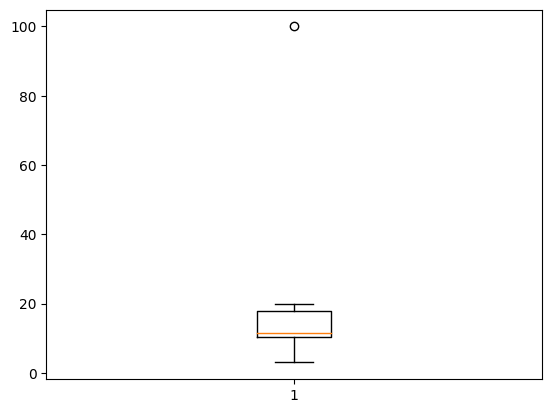

In [13]:
# lets make the boxplot
fig, ax = plt.subplots()
ax.boxplot(data0)


In [14]:
# 
mylegend = [plt.scatter([0],[0], facecolor='r',edgecolor='r', label=species[0]),
            plt.scatter([0],[0], facecolor='g',edgecolor='g', label=species[1]),
            plt.scatter([0],[0], facecolor='b',edgecolor='b', label=species[2])]
plt.close("all") # makes sure no figure is generated

outliers = dict(marker='+', markerfacecolor='black')
medians = dict(linewidth=2)
boxes = np.array([dict(facecolor = 'r', color='r'),
                 dict(facecolor = 'g', color='g'),
                 dict(facecolor = 'b', color='b')])

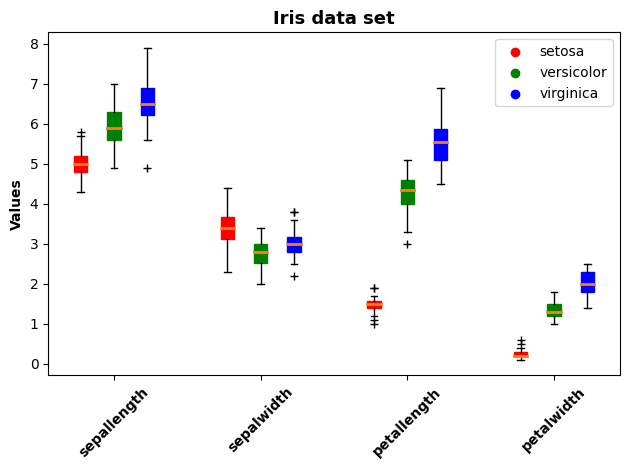

In [21]:
# then making an iterative boxplot
x = -7
step = 5
fig, ax = plt.subplots()

for j in range(len(features)): # for each feature
    x+= 7
    for i in labelsUn: # for each category
        indexes = np.reshape(labels==i,nrows)
        temp  = data[indexes,j]
        ax.boxplot(temp, positions=[x],
                    widths=2,
                    patch_artist=True,
                    medianprops=medians,
                    boxprops=boxes[i-1],
                    flierprops=outliers)
        x+= step

# then you can add some beautification
ax.set_title("Iris data set", fontsize=13, fontweight='bold')
ax.set_ylabel("Values",fontweight='bold')
ax.set_xticks(np.arange(step,x,22))
ax.set_xticklabels(features, fontweight='bold', rotation=45)
ax.legend(handles=mylegend)
fig.tight_layout() # make sure that the aces labels fit the figure

In [23]:
import seaborn as sns

sns.pairplot(ax, hue="species")

TypeError: 'data' must be pandas DataFrame object, not: <class 'matplotlib.axes._subplots.AxesSubplot'>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so